### Q1. Function Approximation with RBFN (10 Marks)

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define the function
def func(x):
    return np.sin(math.pi * x) * 1.2 - np.cos(2.4 * math.pi * x)
# define the corrupted function
def func_co(x):
    return np.sin(math.pi * x) * 1.2 - np.cos(2.4 * math.pi * x) + 0.3 * np.random.normal(0,1,x.shape)

In [3]:
# generate training and test dataset

In [4]:
X_train = np.arange(-1, 1+0.05, 0.05)
X_test = np.arange(-1, 1+0.01, 0.01)

In [5]:
y_train = func_co(X_train)
y_test = func(X_test)

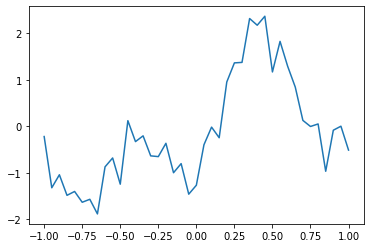

In [6]:
plt.plot(X_train, y_train)

In [7]:
#plt.plot(X_test, y_test)

In [8]:
# define RBF function phi
sigma = 0.1
def phi(r):
    return math.exp(-1 * r**2 / 2 / sigma**2)

In [9]:
class RBF:
    def __init__(self, sigma=1.0, centre_selection='random', hidden_neurons=0, reg = 0):
        self.sigma = sigma
        self.centers = None
        self.weights = None
        self.centre_selection = centre_selection
        self.hidden_neurons = hidden_neurons
        self.reg = reg

    def _kernel_function(self, center, data_point):
        return np.sum(np.exp(- (center-data_point)**2 / (2 * self.sigma**2)))

    def _calculate_interpolation_matrix(self, x):
        matrix = np.zeros((len(x), self.hidden_neurons))
        print(matrix.shape)
        for data_point_arg, data_point in enumerate(x):
            for center_arg, center in enumerate(self.centers):
                matrix[data_point_arg, center_arg] = self._kernel_function(center, data_point)
        return matrix
    
    def _getMaxDist(self,x, random_args):
        max_dist = 0
        # can be optimised to omit duplicated computation
        for i in random_args:
            for j in random_args:
                dist = np.linalg.norm(x[i]-[j])
                if dist > max_dist:
                    max_dist = dist
        return max_dist

    def _select_centers(self, x):
        if self.centre_selection == 'exact_interpolation':
            # simply randomly select centres
            self.hidden_neurons = len(x)
            random_args = np.arange(0, len(x))
        elif self.centre_selection == 'fixed_centers_selected_at_random':
            # randomly select M points
            random_args = np.random.choice(len(x), self.hidden_neurons)
            max_dist = self._getMaxDist(x, random_args)
            self.sigma = max_dist / np.sqrt(2 * self.hidden_neurons)
        centers = x[random_args]
        return centers

    def fit(self, x, y):
        self.centers = self._select_centers(x)
        matrix = self._calculate_interpolation_matrix(x)
        inv_matrix = np.linalg.pinv(matrix)
        trans_matrix = np.transpose(matrix)
        if self.reg != 0:
            inv = np.linalg.pinv( np.dot(trans_matrix, matrix) + self.reg * np.identity(self.hidden_neurons))
            m = np.dot(inv, trans_matrix)
            m = np.dot(m, y)
            self.weights = m
        else:
            self.weights = np.dot(inv_matrix, y)

    def predict(self, x):
        matrix = self._calculate_interpolation_matrix(x)
        predictions = np.dot(matrix, self.weights)
        return predictions

(41, 41)
(201, 41)


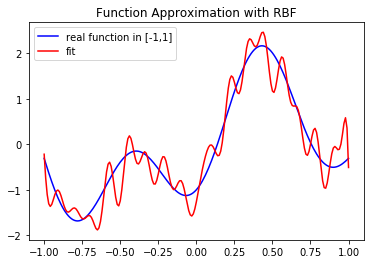

In [10]:
model = RBF(sigma=0.1, centre_selection = 'exact_interpolation')

model.fit(X_train, y_train)
predicted_y = model.predict(X_test)

plt.plot(X_test, y_test, 'b-', label='real function in [-1,1]')
plt.plot(X_test, predicted_y, 'r-', label='fit')
plt.legend(loc='upper left')
plt.title('Function Approximation with RBF')
plt.show()

(41, 15)
(201, 15)


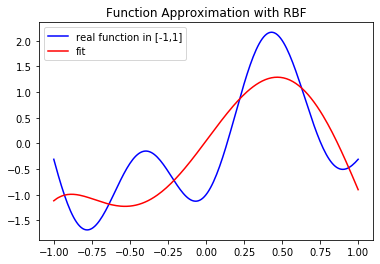

In [11]:
model = RBF(sigma=0.1, centre_selection = 'fixed_centers_selected_at_random', hidden_neurons=15)

model.fit(X_train, y_train)
predicted_y = model.predict(X_test)

plt.plot(X_test, y_test, 'b-', label='real function in [-1,1]')
plt.plot(X_test, predicted_y, 'r-', label='fit')
plt.legend(loc='upper left')
plt.title('Function Approximation with RBF')
plt.show()

(41, 41)
(201, 41)


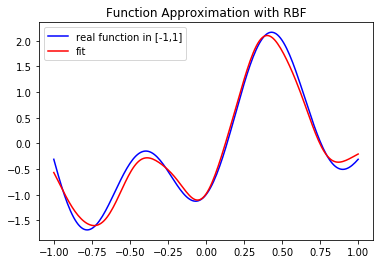

In [12]:
model = RBF(sigma=0.1, centre_selection = 'exact_interpolation', hidden_neurons=15, reg=0.5)

model.fit(X_train, y_train)
predicted_y = model.predict(X_test)

plt.plot(X_test, y_test, 'b-', label='real function in [-1,1]')
plt.plot(X_test, predicted_y, 'r-', label='fit')
plt.legend(loc='upper left')
plt.title('Function Approximation with RBF')
plt.show()

### Q2. Handwritten Digits Classification using RBFN (20 Marks)

In [13]:
import scipy.io
from sklearn.metrics import accuracy_score

In [14]:
mat = scipy.io.loadmat('./MNIST_database.mat')

In [15]:
X_train = mat['train_data'].transpose()
y_train = mat['train_classlabel'].squeeze()
X_test = mat['test_data'].transpose()
y_test = mat['test_classlabel'].squeeze()

In [16]:
def convert_to_one_hot(x, num_of_classes):
    arr = np.zeros((len(x), num_of_classes))
    for i in range(len(x)):
        c = int(x[i])
        arr[i][c] = 1
    return arr

In [17]:
model = RBF(sigma=100, centre_selection = 'exact_interpolation')
y_train_one = convert_to_one_hot(y_train, 10)
model.fit(X_train, y_train_one)
predicted_y = model.predict(X_test)
predicted_y = np.argmax(predicted_y,axis=1)
accuracy_score(y_test, predicted_y)

(1000, 1000)
(250, 1000)


0.508

In [18]:
reg_lst = np.arange(0.1, 0.9, 0.1)
for reg in reg_lst:
    model = RBF(sigma=100, centre_selection = 'exact_interpolation',reg=reg)
    y_train_one = convert_to_one_hot(y_train, 10)
    model.fit(X_train, y_train_one)
    predicted_y = model.predict(X_test)
    predicted_y = np.argmax(predicted_y,axis=1)
    acc = accuracy_score(y_test, predicted_y)
    print('reg: ', reg, 'acc: ', acc)

(1000, 1000)
(250, 1000)
reg:  0.1 acc:  0.608
(1000, 1000)
(250, 1000)
reg:  0.2 acc:  0.564
(1000, 1000)
(250, 1000)
reg:  0.30000000000000004 acc:  0.536
(1000, 1000)
(250, 1000)
reg:  0.4 acc:  0.52
(1000, 1000)
(250, 1000)
reg:  0.5 acc:  0.516
(1000, 1000)
(250, 1000)
reg:  0.6 acc:  0.516
(1000, 1000)
(250, 1000)
reg:  0.7000000000000001 acc:  0.5
(1000, 1000)
(250, 1000)
reg:  0.8 acc:  0.488


In [19]:
reg_lst

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])